<a href="https://www.kaggle.com/code/vusifrelimoskosana/salary-prediction?scriptVersionId=162416144" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Introduction**

Salary prediction using linear regression based on experience is important in various contexts, particularly in HR and workforce planning, for several reasons:

Linear regression models can help organizations make informed decisions about salary offers to candidates based on their experience, ensuring competitive yet cost-effective compensation packages; It promotes fairness in compensation by basing salary offers on objective factors like experience, reducing the likelihood of wage disparities; Accurate salary predictions can help prevent underpaying or overpaying employees, which can contribute to higher job satisfaction and lower turnover rates; Businesses can budget effectively for their workforce, allocating resources efficiently based on expected salary costs; Competitive salary predictions can attract top talent by offering competitive compensation packages aligned with market standards; Performance Evaluation: Linear regression can be used to assess whether an employee's salary aligns with their experience and performance, aiding in performance reviews and merit-based raises; Compliance: Ensuring that compensation is aligned with experience and performance helps organizations comply with labor laws and regulations related to fair pay; Using machine learning for salary prediction allows HR departments to adopt data-driven approaches to compensation management, leading to more efficient and equitable processes.

This machine learning mini-project contains the code which predicts salary based on experience using linear regression model:

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

**1. Data Understanding: loading and exploring dataset**

In [2]:
df=pd.read_csv('/kaggle/input/salary-dataset/Salary.csv')
display(df.head())

print('**The shape or dimension of the data is as follows:** \n',df.shape,'\n') #Checking the shape of the data
print('**checking missing values from each column:** \n',df.isnull().sum())  #chacking missing values
print('**checking NaN values from each column:** \n',df.isna().sum()) #chacking NaN values

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


**The shape or dimension of the data is as follows:** 
 (35, 2) 

**checking missing values from each column:** 
 YearsExperience    0
Salary             0
dtype: int64
**checking NaN values from each column:** 
 YearsExperience    0
Salary             0
dtype: int64


**2. Model Training: Split the dataset into training and testing sets**

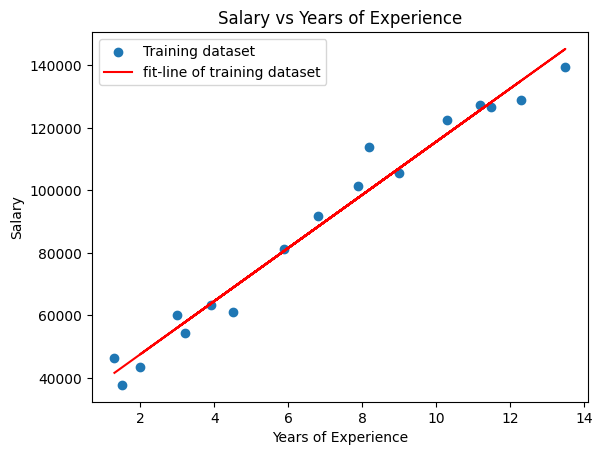

In [3]:

X= np.array(df['YearsExperience']).reshape(-1,1)
y=np.array(df['Salary'])

reg= LinearRegression()
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.5, random_state=42)
reg.fit(X_train,y_train)
val_pred=reg.predict(X_train) #Predicted training values

#plotting
plt.scatter(X_train,y_train, label='Training dataset')
plt.xlabel("Years of Experience")
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.plot(X_train,val_pred, color='red', label='fit-line of training dataset')
plt.legend()
plt.show()

**3. Model Evaluation: Evaluating the performance of the trained model using appropriate evaluation metrics, i.e R^2**

In [4]:
y_pred= reg.predict(X_test) #Predicted test values

score_value= r2_score(y_test,y_pred) #it's in 2D array
print('The R^2 is: ', score_value)

The R^2 is:  0.9483192462559722


**4. Model Deployment: Deploying the optimised model to make predictions on new, unseen data.**

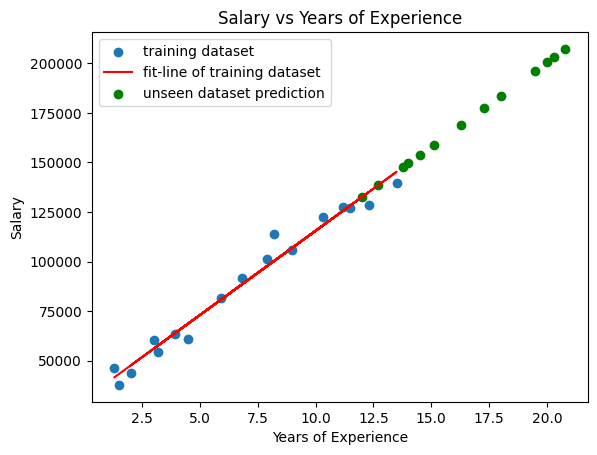

In [5]:
#We create a list of unseen data, i.e number of years
X_unseen= np.array([12, 12.7, 13.8, 14, 14.5, 15.1,16.3,17.3, 18, 19.5, 20,20.3,20.8]).reshape(-1,1)
new_y_pred=reg.predict(X_unseen)

#predict the new unseen data on a new model (best model implemented)
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.5, random_state=42)
reg.fit(X_train,y_train)
val_pred=reg.predict(X_train) #Predicted training values

#plotting the unseen data points
plt.scatter(X_train,y_train, label='training dataset')
plt.xlabel("Years of Experience")
plt.ylabel('Salary')
plt.title('Salary vs Years of Experience')
plt.plot(X_train,val_pred, color='red', label='fit-line of training dataset')
plt.scatter(X_unseen,new_y_pred, color='green', label='unseen dataset prediction')
plt.legend()
plt.show()